In [1]:
# Currently WIP

# Data Exploration and Cleaning

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../input/redbubble_featured2 (1).csv')

In [4]:
df.head()

,web-scraper-order,web-scraper-start-url,link,link-href,reviewer,review,date,star_rating
0,1563670371-12249,https://www.redbubble.com/,$17.20Anais and Granny Jojo,https://www.redbubble.com/people/iruexposito/w...,"by JANE M. on Jan 4, 2017","T shirt bought for 14 year old girl, usually s...","Jan 4, 2017","<div class=""default__box--1nnil"" style=""margin..."
1,1563670557-14983,https://www.redbubble.com/,$17.20The Math Of Love Triangles,https://www.redbubble.com/people/silverphxart/...,"by Andre on Jan 13, 2018",Bought as a gift and I was hesitant. The shirt...,"Jan 13, 2018","<div class=""default__box--1nnil"" style=""margin..."
2,1563670540-14628,https://www.redbubble.com/,$12.00Summer has arrived in the italian alps,https://www.redbubble.com/people/zakaz86/works...,"by Marisa M. on Apr 16, 2018","Me encantan los dos productos que solicité, es...","Apr 16, 2018","<div class=""default__box--1nnil"" style=""margin..."
3,1563670528-14469,https://www.redbubble.com/,$16.90MANEKI WASH BLUE,https://www.redbubble.com/people/theeighth/wor...,"by sara c. on Dec 13, 2016",The handles om the mugs were big and great. Th...,"Dec 13, 2016","<div class=""default__box--1nnil"" style=""margin..."
4,1563670435-13265,https://www.redbubble.com/,$12.50tropical bird of paradise,https://www.redbubble.com/people/youdesignme/w...,"by Madison on Aug 8, 2015","The image was well done, the paper was a littl...","Aug 8, 2015","<div class=""default__box--1nnil"" style=""margin..."


In [5]:
# replace HTML code with numerical 1-5 rating
for column in range(len(df['star_rating'])):
    df['star_rating'][column] = df['star_rating'][column].count("255")


# df['star_rating'][1] = df['star_rating'][1].count("255")

df.head()

,web-scraper-order,web-scraper-start-url,link,link-href,reviewer,review,date,star_rating
0,1563670371-12249,https://www.redbubble.com/,$17.20Anais and Granny Jojo,https://www.redbubble.com/people/iruexposito/w...,"by JANE M. on Jan 4, 2017","T shirt bought for 14 year old girl, usually s...","Jan 4, 2017",4
1,1563670557-14983,https://www.redbubble.com/,$17.20The Math Of Love Triangles,https://www.redbubble.com/people/silverphxart/...,"by Andre on Jan 13, 2018",Bought as a gift and I was hesitant. The shirt...,"Jan 13, 2018",5
2,1563670540-14628,https://www.redbubble.com/,$12.00Summer has arrived in the italian alps,https://www.redbubble.com/people/zakaz86/works...,"by Marisa M. on Apr 16, 2018","Me encantan los dos productos que solicité, es...","Apr 16, 2018",5
3,1563670528-14469,https://www.redbubble.com/,$16.90MANEKI WASH BLUE,https://www.redbubble.com/people/theeighth/wor...,"by sara c. on Dec 13, 2016",The handles om the mugs were big and great. Th...,"Dec 13, 2016",5
4,1563670435-13265,https://www.redbubble.com/,$12.50tropical bird of paradise,https://www.redbubble.com/people/youdesignme/w...,"by Madison on Aug 8, 2015","The image was well done, the paper was a littl...","Aug 8, 2015",4


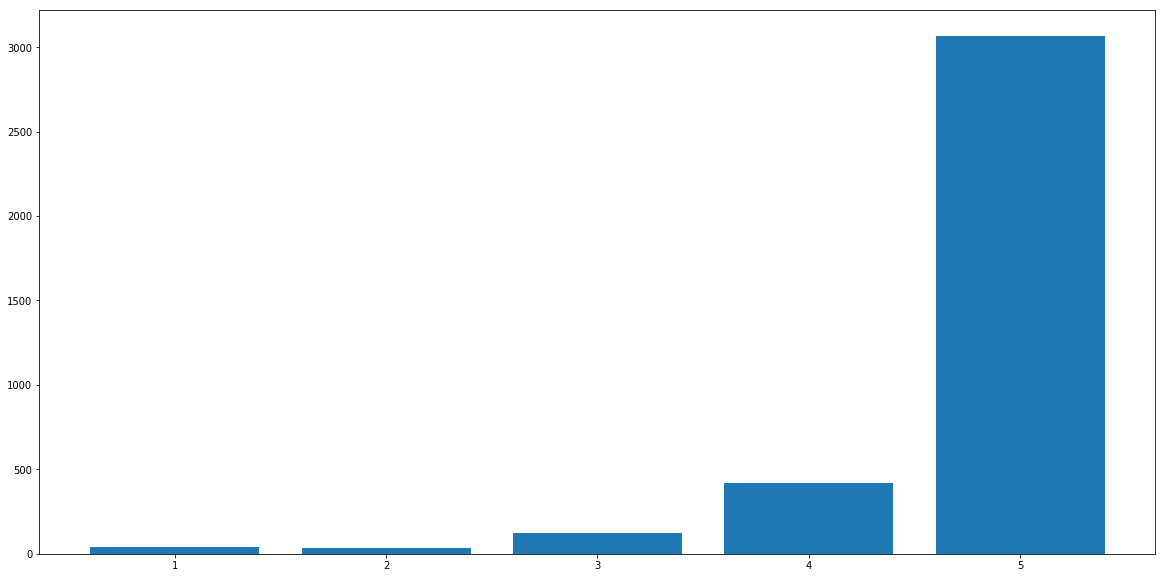

In [6]:
import matplotlib.pyplot as plt

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.figure(figsize=(20,10))
plt.bar(df['star_rating'].sort_values().unique(), df['star_rating'].value_counts().sort_index())
plt.show()

In [7]:
import re 
  
# Function to clean the names. Removes all excess text so only the name of the reviewer is given
def clean_reviewer(reviewer): 
    # Search for opening bracket in the name followed by 
    # any characters repeated any number of times 
    if re.search('by ', reviewer): 
  
        # Extract the position of end and then beginning of pattern 
        pos = re.search('by ', reviewer).end() 
        pos2 = re.search(' on', reviewer).start() 
  
        # return the cleaned name 
        return reviewer[pos:pos2] 
  
    else: 
        # if clean up needed return the same name 
        return reviewer 

In [8]:
for column in range(len(df['star_rating'])):
    df['reviewer'][column] = clean_reviewer(df['reviewer'][column])
    
df.head()

,web-scraper-order,web-scraper-start-url,link,link-href,reviewer,review,date,star_rating
0,1563670371-12249,https://www.redbubble.com/,$17.20Anais and Granny Jojo,https://www.redbubble.com/people/iruexposito/w...,JANE M.,"T shirt bought for 14 year old girl, usually s...","Jan 4, 2017",4
1,1563670557-14983,https://www.redbubble.com/,$17.20The Math Of Love Triangles,https://www.redbubble.com/people/silverphxart/...,Andre,Bought as a gift and I was hesitant. The shirt...,"Jan 13, 2018",5
2,1563670540-14628,https://www.redbubble.com/,$12.00Summer has arrived in the italian alps,https://www.redbubble.com/people/zakaz86/works...,Marisa M.,"Me encantan los dos productos que solicité, es...","Apr 16, 2018",5
3,1563670528-14469,https://www.redbubble.com/,$16.90MANEKI WASH BLUE,https://www.redbubble.com/people/theeighth/wor...,sara c.,The handles om the mugs were big and great. Th...,"Dec 13, 2016",5
4,1563670435-13265,https://www.redbubble.com/,$12.50tropical bird of paradise,https://www.redbubble.com/people/youdesignme/w...,Madison,"The image was well done, the paper was a littl...","Aug 8, 2015",4


In [9]:
df['reviewer'].value_counts()

Amy             24
Sarah           22
Chris           14
Laura           14
Christine       13
Stephanie       13
John            13
Karen           13
Anna            13
Alison          13
Emily           12
Natalie         11
Amanda          11
Michelle        11
Mary            11
Ryan            11
Alexandra       11
Daniel          10
Rachel          10
Sophia          10
Jessica         10
Beth            10
Anne            10
Stephen         10
James           10
Alan            10
Alex            10
Jennifer        10
Lucia           10
Katie            9
                ..
Kristina E.      2
Piia K.          2
Birgit           2
Péter            2
Mary O.          2
Airam G.         2
Jo D.            2
Rocio S.         2
Paul H.          2
charlotte p.     2
Mardell l.       2
Stacey K.        2
Patrick d.       2
mo               2
Maddie R.        2
Hayley M.        2
Sabine M.        2
William T.       2
Kristian J.      2
Shelby           2
Jim              2
Chelsea     

In [10]:
df['review'].value_counts()

Love it                                                                                                                                                                                                                                                                                                                                                                                                   19
Good quality                                                                                                                                                                                                                                                                                                                                                                                              11
The shirt was perfect! I loved it!                                                                                                                                                                            

In [11]:
reviewer_dict = {}

for value in df['reviewer']:
    if value not in reviewer_dict:
        reviewer_dict[value] = 1
    else:
        reviewer_dict[value] += 1

reviewer_dict

{'JANE M.': 3,
 'Andre': 7,
 'Marisa M.': 6,
 'sara c.': 3,
 'Madison': 3,
 'Emma R.': 6,
 'Mrs C.': 7,
 'Brian R.': 3,
 'Michelle K.': 4,
 'Stephanie': 13,
 'Katelyn P.': 3,
 'CSI E.': 3,
 'Sam M.': 7,
 'Charlotte P.': 3,
 'Margot B.': 4,
 'Samuel T.': 4,
 'Ashlyn': 3,
 'Gabrielle': 7,
 'Tonya F.': 3,
 'Anthony': 6,
 'David T.': 7,
 'Kaycee i.': 7,
 'Joshua Y.': 4,
 'Monica r.': 7,
 'John': 13,
 'Michelle': 11,
 'Caitlyn': 4,
 'Tess': 4,
 'Bennett M.': 4,
 'Hannah': 6,
 'Gabe M.': 7,
 'Heidi': 4,
 'Chris': 14,
 'Louise': 6,
 'Patricia': 8,
 'Keisha': 4,
 'martin': 7,
 'Daniel A.': 7,
 'addie a.': 4,
 'Casper': 7,
 'Vanessa K.': 4,
 'Hannah O.': 4,
 'Kelly': 7,
 'Ivan G.': 3,
 'Eli H.': 4,
 'Jérémy': 4,
 'Daniel': 10,
 'Rita': 4,
 'Dana S.': 4,
 'tina': 7,
 'Breanna R.': 4,
 'Joe M.': 6,
 'Lily Z.': 4,
 'Svetlana': 4,
 'Nicholas': 3,
 'Rachele': 3,
 'Katie F.': 4,
 'NANCY H.': 4,
 'Bruce': 3,
 'Tim B.': 4,
 'Ole': 7,
 'Beth P.': 3,
 'Maggie W.': 7,
 'Mary B.': 4,
 'Suzanne': 6,
 'Lydia

In [12]:
df_reviewer = pd.DataFrame(list(reviewer_dict.items()), columns = ['User', '# Reviews'])
df_reviewer.sort_values('# Reviews', ascending = False).head(20)

,User,# Reviews
248,Amy,24
218,Sarah,22
313,Laura,14
32,Chris,14
24,John,13
178,Karen,13
347,Alison,13
9,Stephanie,13
150,Anna,13
244,Christine,13


In [13]:
# Sanity checking above code
(df['reviewer'] == 'Amy').sum()

24

In [14]:
df.sort_values('link').head()

,web-scraper-order,web-scraper-start-url,link,link-href,reviewer,review,date,star_rating
293,1563670281-11413,https://www.redbubble.com/,$12.00Night Garden,https://www.redbubble.com/people/irtsya/works/...,Ardith E.,handy little zippered pouch - i even gave one ...,"Jun 23, 2018",5
168,1563670281-11430,https://www.redbubble.com/,$12.00Night Garden,https://www.redbubble.com/people/irtsya/works/...,Riannon,The image quality was fantastic and the materi...,"May 11, 2016",4
3253,1563670281-11421,https://www.redbubble.com/,$12.00Night Garden,https://www.redbubble.com/people/irtsya/works/...,Sandra B.,Looks nuce. Happy with it,"Dec 14, 2017",5
526,1563670281-11443,https://www.redbubble.com/,$12.00Night Garden,https://www.redbubble.com/people/irtsya/works/...,Kerri,Very sturdy - will last a LONG time.,"May 18, 2015",4
158,1563670281-11446,https://www.redbubble.com/,$12.00Night Garden,https://www.redbubble.com/people/irtsya/works/...,Kristina C.,I loved my Studio Pouch so much I ordered anot...,"May 6, 2015",5


In [15]:
# Total of 59 different products
df['link'].nunique()

59

# Creating the recommender system

In [16]:
from fastai.collab import *
from fastai.tabular import *

In [17]:
data = CollabDataBunch.from_df(df, seed=42, valid_pct=0.1, user_name = 'reviewer', item_name = 'link', rating_name = 'star_rating')

In [18]:
data

TabularDataBunch;

Train: LabelList (3315 items)
x: CollabList
reviewer JANE M.; link $17.20Anais and Granny Jojo; ,reviewer Andre; link $17.20The Math Of Love Triangles; ,reviewer Marisa M.; link $12.00Summer has arrived in the italian alps; ,reviewer sara c.; link $16.90MANEKI WASH BLUE; ,reviewer Madison; link $12.50tropical bird of paradise; 
y: FloatList
4.0,5.0,5.0,5.0,4.0
Path: .;

Valid: LabelList (368 items)
x: CollabList
reviewer Emma R.; link $25.00Koi fish oriental design; ,reviewer sarah; link $25.00Greyhounds dogwalk // turquoise background; ,reviewer Amy; link $20.814901; ,reviewer Marcus W.; link $21.50Pretty Little Purrmaid; ,reviewer Billie F.; link $17.63BFF wefie; 
y: FloatList
5.0,5.0,5.0,5.0,5.0
Path: .;

Test: None

In [19]:
data.show_batch()

reviewer,link,target
Claudia S.,$35.50Giant Whales,5.0
Anna,$18.20Flowers for BMO,5.0
Jennifer M.,$2.47Coffee Time!,5.0
John,$17.20The Math Of Love Triangles,5.0
Nyha,$2.51BALLS / Tennis (Grass Court),5.0


In [20]:
y_range = [1.0,5.0]

In [21]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


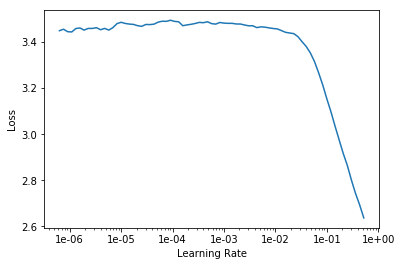

In [22]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [23]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,3.395597,3.290481,00:00
1,2.307067,1.014755,00:00
2,1.001899,0.328737,00:00
3,0.435989,0.228683,00:00
4,0.221300,0.215268,00:00


In [24]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(829, 40)
  (i_weight): Embedding(58, 40)
  (u_bias): Embedding(829, 1)
  (i_bias): Embedding(58, 1)
)

In [25]:
learn.model.u_bias

Embedding(829, 1)

# Comparing predictions to actual

In [26]:
# Actual first 5 ratings
df['star_rating'].head()

0    4
1    5
2    5
3    5
4    4
Name: star_rating, dtype: object

In [27]:
# Predicted first 5 ratings
for i in range(0,5):
    print(learn.predict(df.iloc[i]))

(FloatItem 4.0192223, tensor(4.0192), tensor(4.0192))
(FloatItem 4.8356533, tensor(4.8357), tensor(4.8357))
(FloatItem 4.441925, tensor(4.4419), tensor(4.4419))
(FloatItem 4.7014637, tensor(4.7015), tensor(4.7015))
(FloatItem 4.0168185, tensor(4.0168), tensor(4.0168))


In [29]:
g = df.groupby('link')['star_rating'].count()
top_items = g.sort_values(ascending=False).index.values[:1000]
# top_items = g.sort_values(ascending=False).index

top_items[:10]

array(['$17.63BFF wefie', '$2.51BALLS / Tennis (Grass Court)', '$2.47ENVOL', '$17.20The Math Of Love Triangles',
       '$2.47Coffee Time!', "$19.35It's A Small World After All", '$21.50Pretty Little Purrmaid',
       '$17.20Shark Summer Fun', "$17.20Don't Talk To Strangers", '$18.20Flowers for BMO'], dtype=object)

In [30]:
# TODO: BLOCKED. Should be creating an array of tensors but is not?
learn.bias(top_items)

You're trying to access an item that isn't in the training data.
                  If it was in your original data, it may have been split such that it's only in the validation set now.


TypeError: embedding(): argument 'indices' (position 2) must be Tensor, not NoneType

In [ ]:
item_bias = learn.bias(top_items, is_item=True)
item_bias.shape